<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [8]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


5992


C:\Users\pangr\AppData\Local\Temp\ipykernel_10364\2080397984.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DevType'].fillna('Unknown', inplace=True)


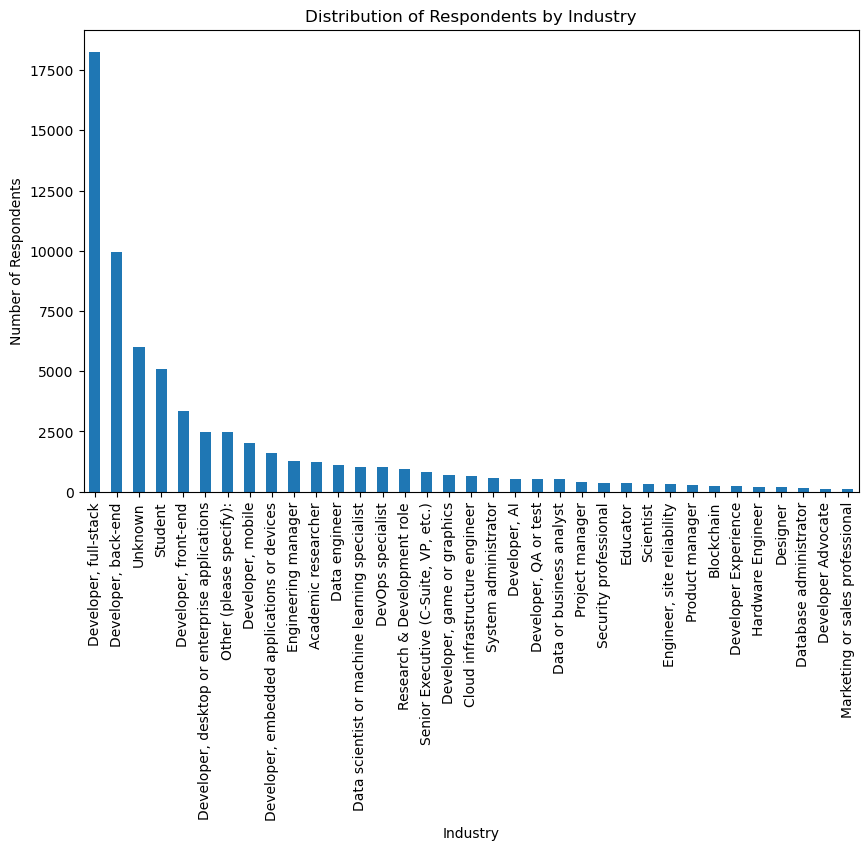

In [9]:
##Write your code here
print(df['DevType'].isnull().sum())
df['DevType'].fillna('Unknown', inplace=True)

df['DevType'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Industry')
plt.xticks(rotation=90)
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [10]:
##Write your code here
mean_value = df['ConvertedCompYearly'].mean()
median_value = df['ConvertedCompYearly'].median()
std_value = df['ConvertedCompYearly'].std()

threshold = mean_value + 3 * std_value

outliers = df[df['ConvertedCompYearly'] > threshold]

print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_value)
print("Outliers:")
print(outliers)

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.9730862951
Outliers:
       ResponseId                                         MainBranch  \
529           530                     I am a developer by profession   
828           829                     I am a developer by profession   
1932         1933                     I am a developer by profession   
2171         2172                     I am a developer by profession   
2187         2188                     I am a developer by profession   
...           ...                                                ...   
38219       38220  I am not primarily a developer, but I write co...   
39643       39644                     I am a developer by profession   
40066       40067                     I am a developer by profession   
40952       40953                     I am a developer by profession   
41027       41028                     I am a developer by profession   

                   Age                         

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers in ConvertedCompYearly: 978


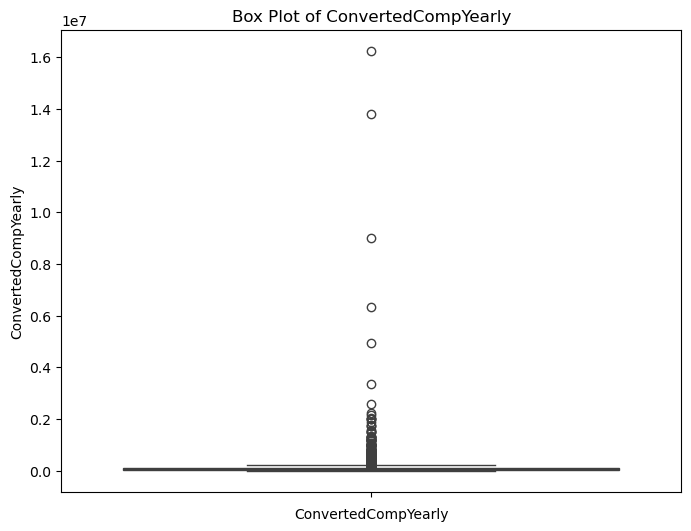

In [11]:
##Write your code here
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count the number of outliers
outlier_count = len(outliers)
print("Number of outliers in ConvertedCompYearly:",outlier_count)

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df['ConvertedCompYearly'])
plt.title('Box Plot of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


In [12]:
##Write your code here

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print("Original DataFrame size:", df.shape)
print("DataFrame size after removing outliers:", df_no_outliers.shape)



Original DataFrame size: (65437, 114)
DataFrame size after removing outliers: (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


The correlations of Age and ConvertedCompYearly is :
                      Age_numeric  ConvertedCompYearly
Age_numeric             1.000000             0.366287
ConvertedCompYearly     0.366287             1.000000


C:\Users\pangr\AppData\Local\Temp\ipykernel_10364\44290386.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_numeric'] = df_no_outliers['Age'].map(age_mapping)


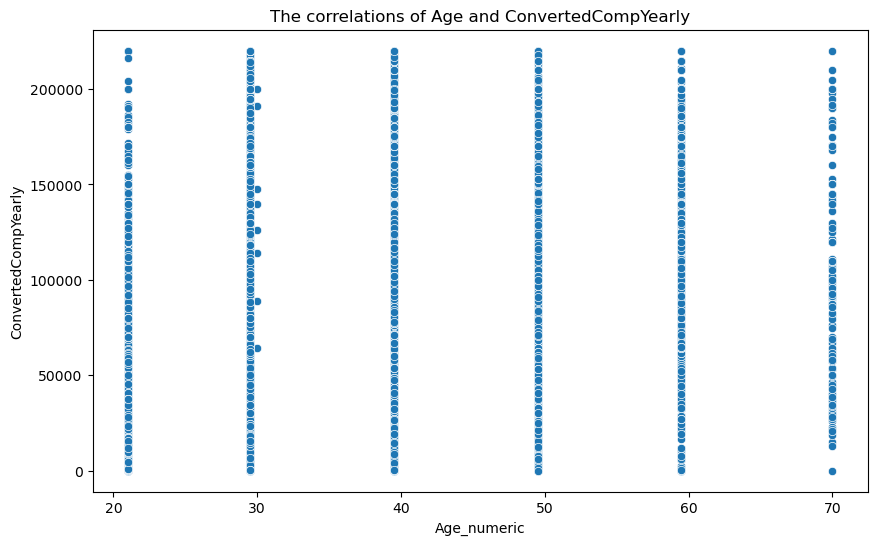

In [13]:
##Write your code here

# Create a age mapping for age calculation

age_mapping = {                                              
    'under 18 years old': 17,
    '18-24 years old': (18 + 24) / 2,
    '25-34 years old': (25 + 34) / 2,
    '35-44 years old': (35 + 44) / 2,
    '45-54 years old': (45 + 54) / 2,
    '55-64 years old': (55 + 64) / 2,
    '65 years or older': 70,
    'Prefer not to say': 30
}

# Compute correlations between Age and ConvertedCompYearly.
df_no_outliers['Age_numeric'] = df_no_outliers['Age'].map(age_mapping)
df2=df_no_outliers[['Age_numeric','ConvertedCompYearly']]
Corr_age_compyear=df2.corr()
print('The correlations of Age and ConvertedCompYearly is :\n',Corr_age_compyear )

#Visualize the correlation matrix.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Age_numeric', y='ConvertedCompYearly')
plt.title('The correlations of Age and ConvertedCompYearly')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
